In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def count_collisions(array1, array2, threshold=3):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        threshold: float, distance below which a collision is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    # Compute pairwise distances along the trajectory (n_traj, horizon)
    distances = np.linalg.norm(array1 - array2, axis=2)

    # print(distances)

    # Check where distance is below threshold
    collision_mask = distances < threshold  # shape: (n_traj, horizon)

    # Count how many trajectories have at least one collision
    num_colliding_trajectories = np.sum(np.any(collision_mask, axis=1))

    return num_colliding_trajectories

In [4]:
def count_collisions_obstacle(array1, array2, radius=4):
    """
    Count number of trajectories that experience at least one collision 
    between corresponding trajectories in array1 and array2.

    Parameters:
        array1: np.ndarray of shape (n_traj, horizon, num_states)
        array2: np.ndarray of shape (n_traj, horizon, num_states)
        radius: float, distance below which a collision with the obstacle is counted

    Returns:
        num_colliding_trajectories: int
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"

    collision_count = 0
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if np.linalg.norm(array1[i][j] - np.array([10, 0])) < radius or \
               np.linalg.norm(array2[i][j] - np.array([10, 0])) < radius:
                collision_count += 1
                break
    
    return collision_count

In [5]:
def count_total_collisions(array1, array2,
                           threshold: float = 3.0,
                           radius: float = 4.0,
                           obstacle_center: np.ndarray = np.array([10.0, 0.0])
                          ) -> int:
    """
    Count number of trajectory-pairs that experience at least one
    collision *either* between array1 and array2 *or* with the obstacle.

    Parameters:
        array1: np.ndarray, shape (n_traj, horizon, num_states)
        array2: np.ndarray, shape (n_traj, horizon, num_states)
        threshold: float, distance below which two agents collide
        radius: float, distance below which an agent collides with obstacle
        obstacle_center: np.ndarray, shape (2,), [x,y] of the obstacle

    Returns:
        total_collisions: int
            number of trajectories where (self-collision ∪ obstacle-collision)
    """
    assert array1.shape == array2.shape, "Arrays must have the same shape"
    n_traj, horizon, num_states = array1.shape

    # 1) self-collision mask: shape (n_traj,)
    dists = np.linalg.norm(array1 - array2, axis=2)        # (n_traj, horizon)
    self_collision = np.any(dists < threshold, axis=1)     # (n_traj,)

    # 2) obstacle-collision mask: shape (n_traj,)
    #    (check only the XY dimensions for obstacle contact)
    pos1 = array1[..., :2]                                 # (n_traj, horizon, 2)
    pos2 = array2[..., :2]                                 # (n_traj, horizon, 2)
    d1 = np.linalg.norm(pos1 - obstacle_center, axis=2)    # (n_traj, horizon)
    d2 = np.linalg.norm(pos2 - obstacle_center, axis=2)    # (n_traj, horizon)
    obs_collision = np.any((d1 < radius) | (d2 < radius), axis=1)

    # 3) union and count
    total_mask = self_collision | obs_collision
    return int(np.sum(total_mask))

In [6]:
# CTDE Diffusion No Final Position

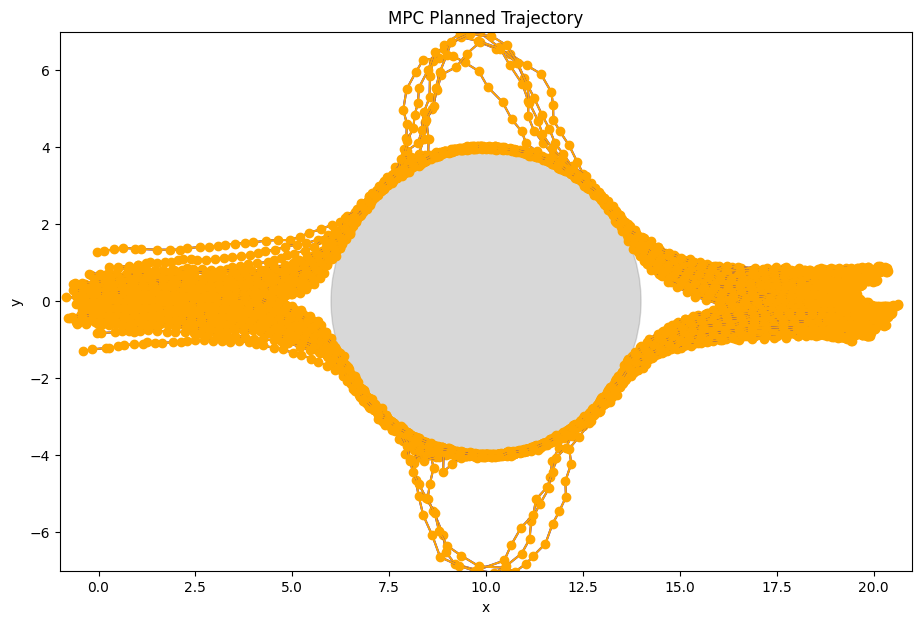

In [7]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion No Final Position")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_nolf_nofinalpos_matchtrain_50k/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

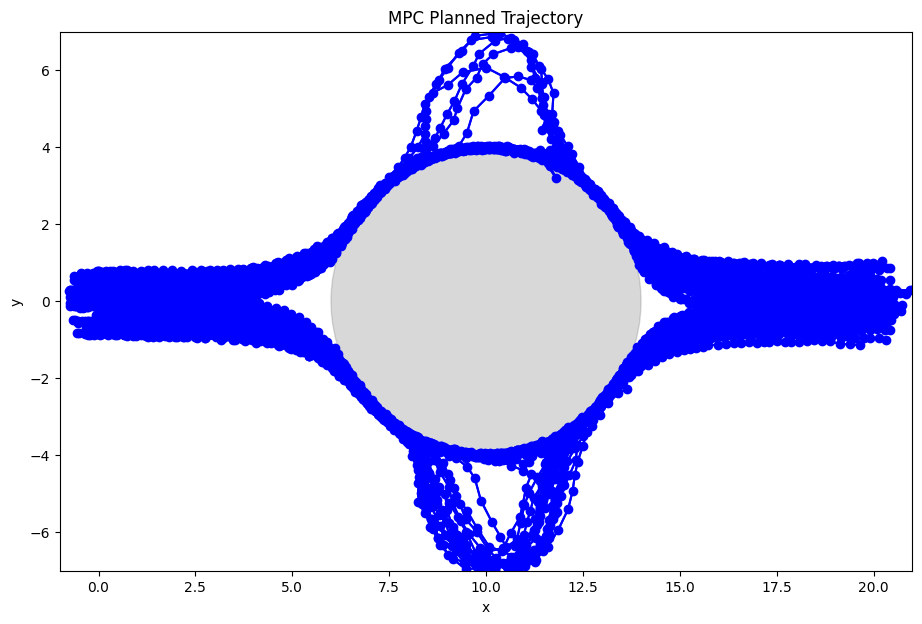

In [8]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_nolf_nofinalpos_matchtrain_50k/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

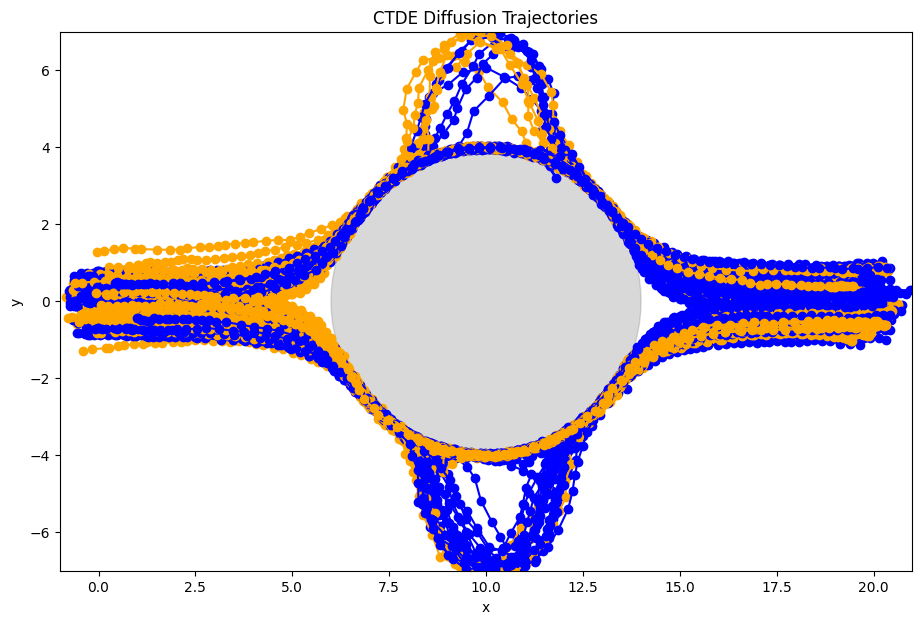

In [9]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [10]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(21)

In [11]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [12]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

21

In [13]:
# Vanilla CTDE Diffusion No Final Position

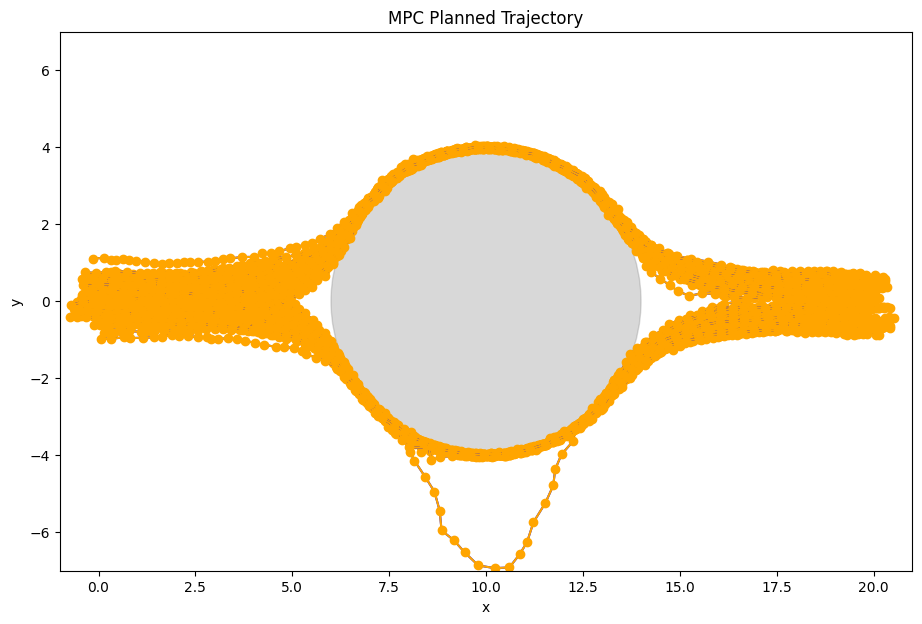

In [14]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_nofinalpos_matchtrain_50k/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

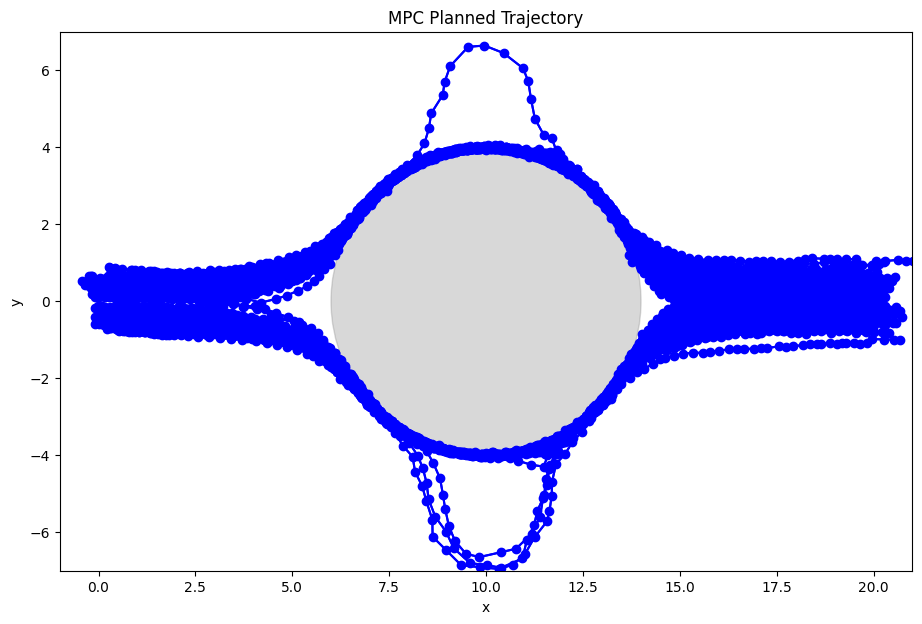

In [15]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/mpc_P25E1_vanillaCTDE_nofinalpos_matchtrain_50k/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

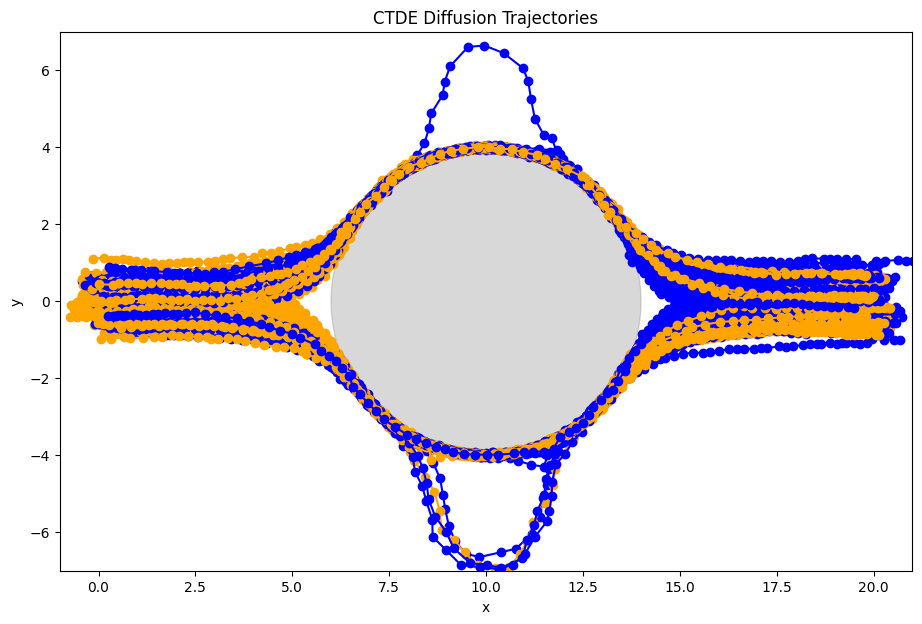

In [16]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [17]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(54)

In [18]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [19]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

54

In [20]:
# BC Conditioned on Own Current Position and Own Goal Position

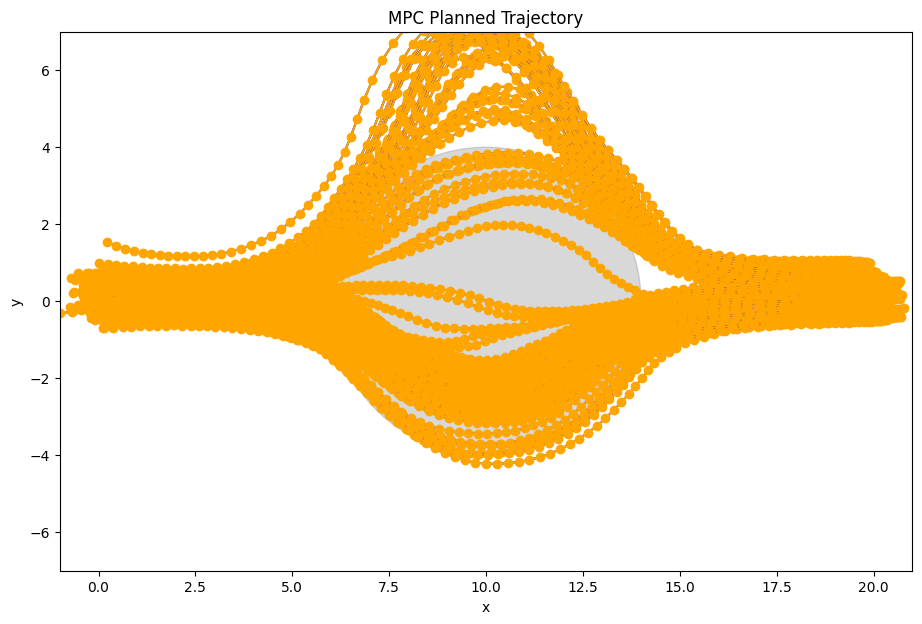

In [31]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_big/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

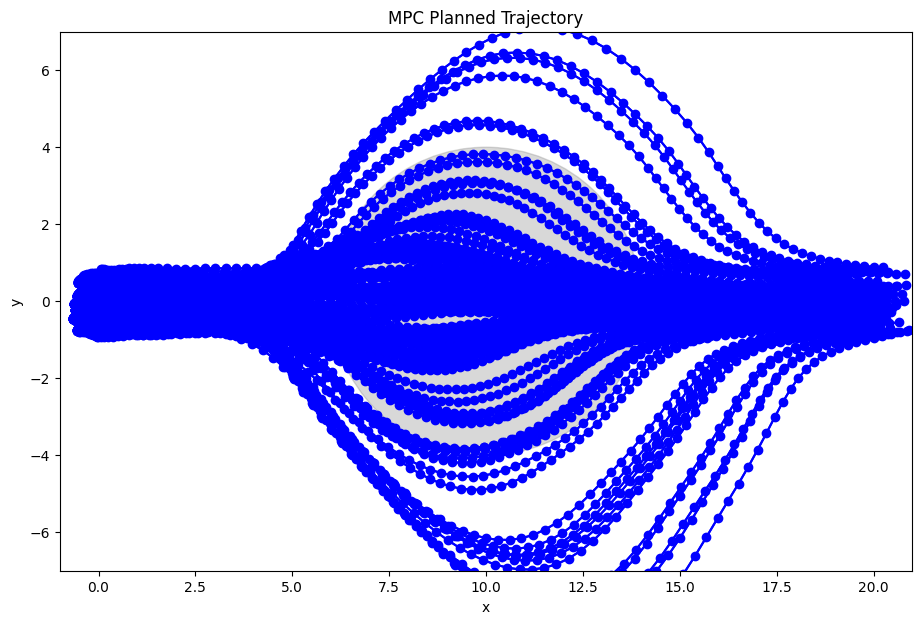

In [32]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_big/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

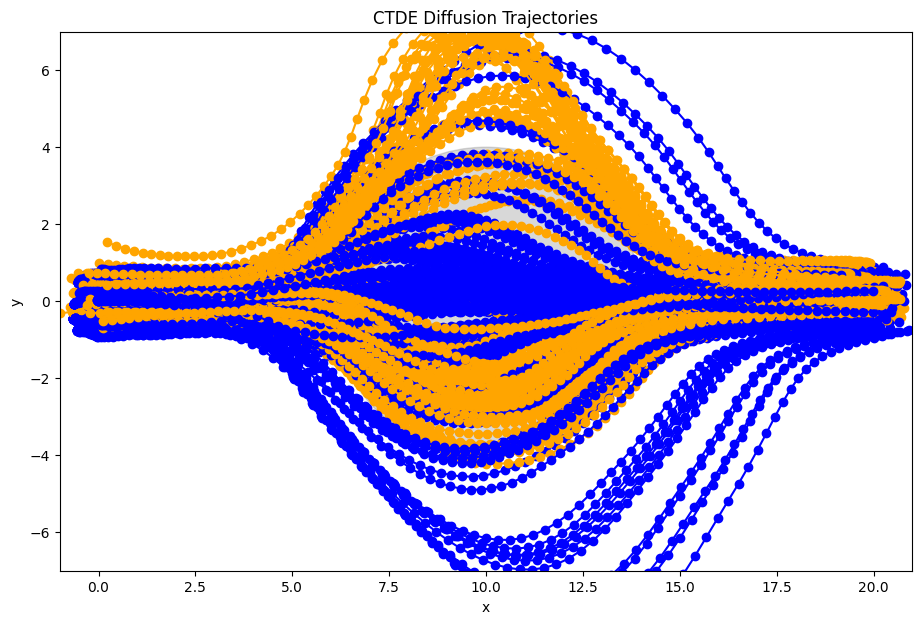

In [33]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [34]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(39)

In [35]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

92

In [36]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

95

In [ ]:
# BC Conditioned on Own Current Position and Other's Current Position

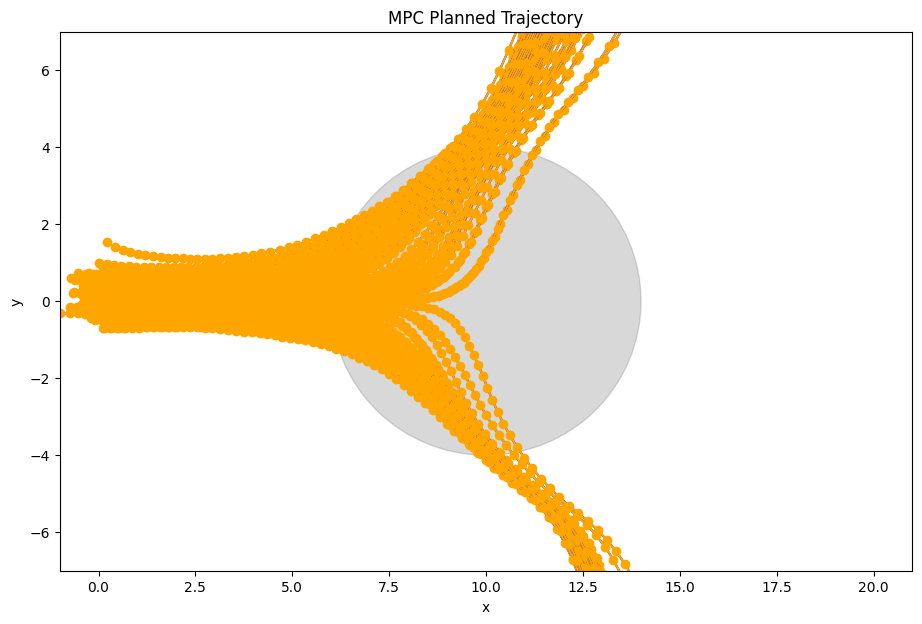

In [45]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_nofinalpos_redo/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

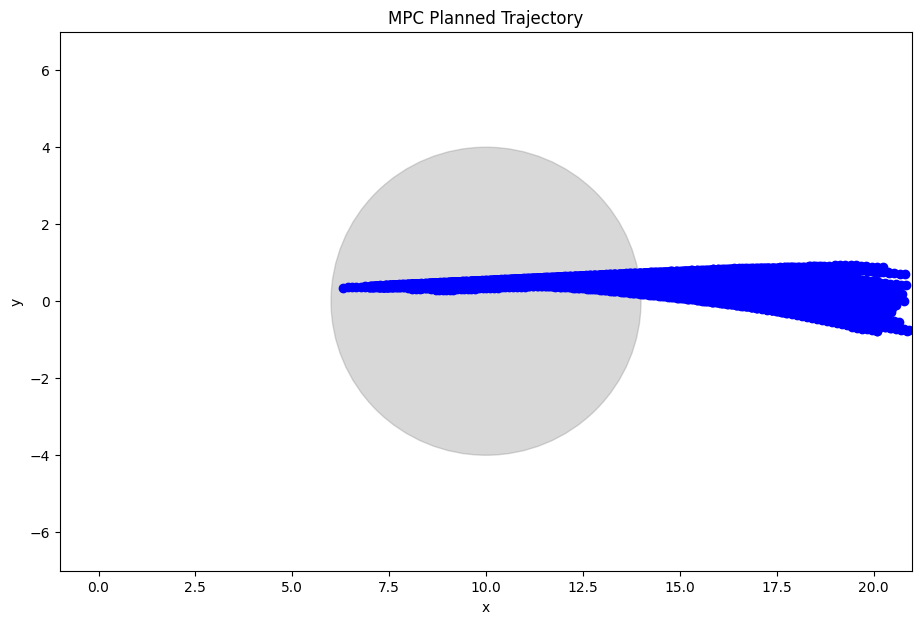

In [46]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/bc_nofinalpos_redo/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

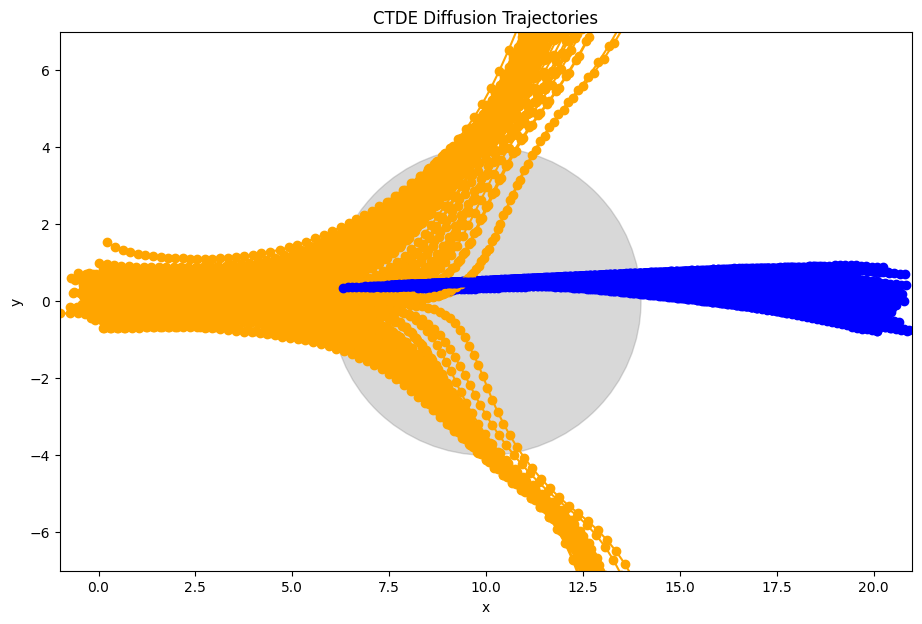

In [47]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [48]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(2)

In [49]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [50]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

100

In [44]:
# MAGAIL Conditioned on Own Current Position and Own Goal Position Vary Initial Position

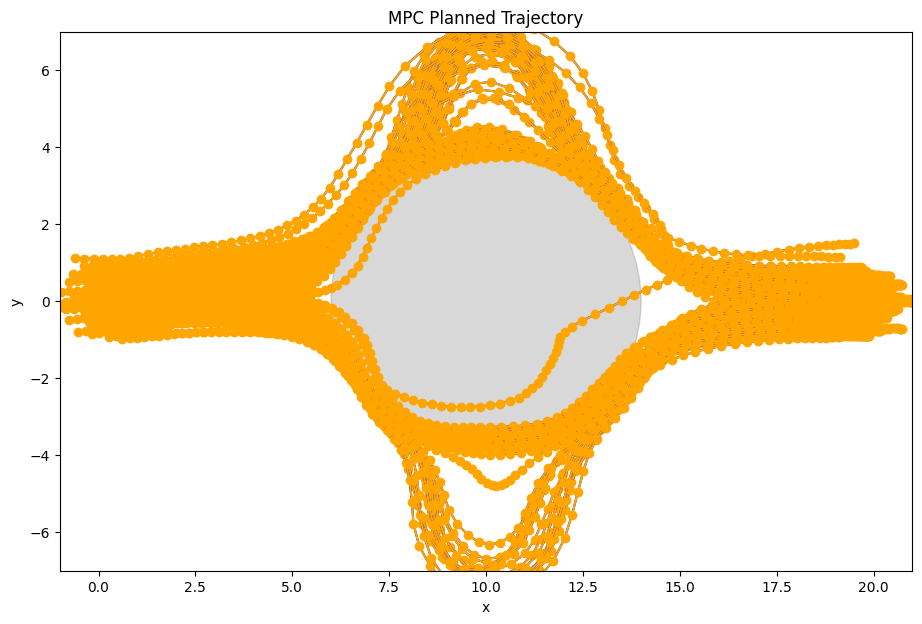

In [52]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

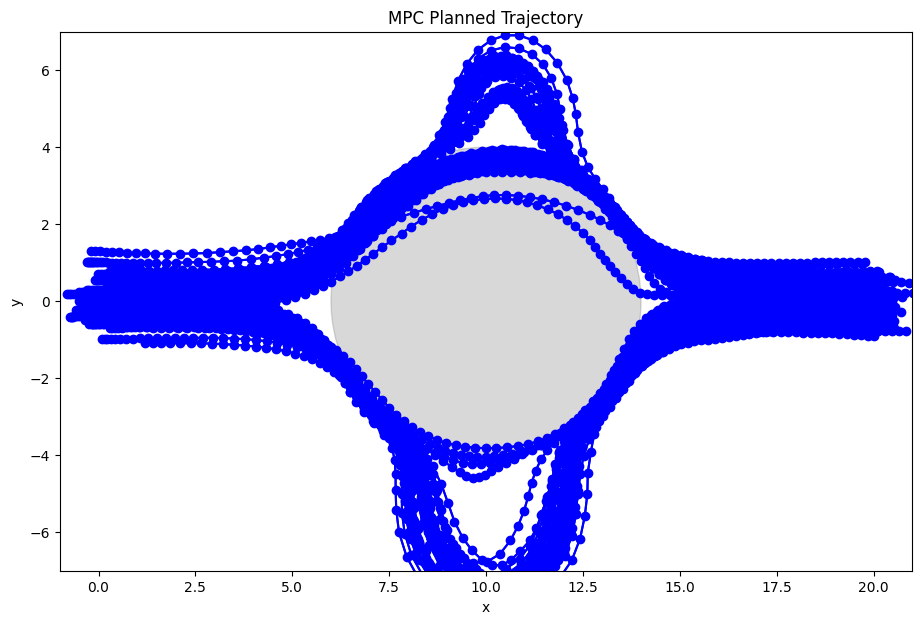

In [53]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

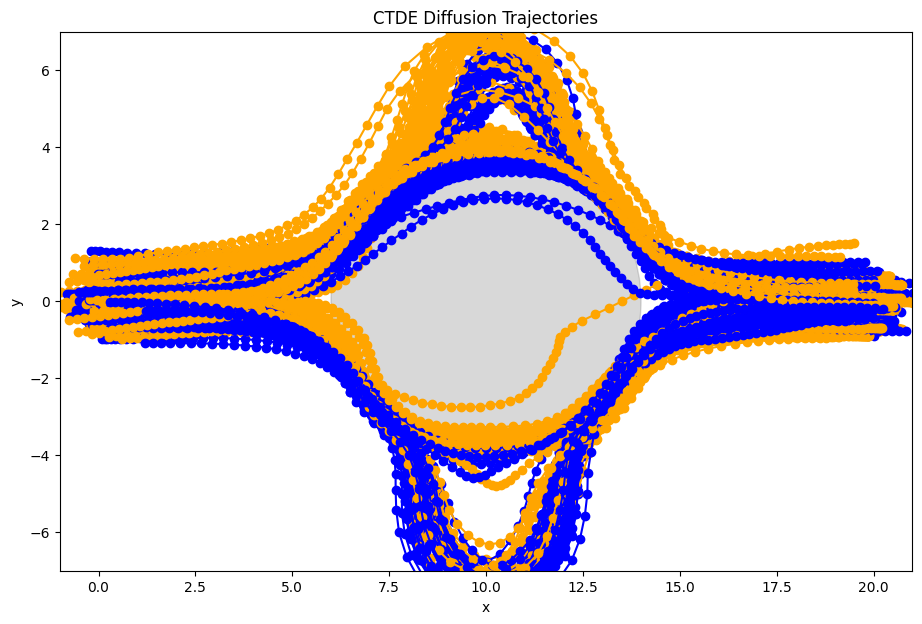

In [54]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [55]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(47)

In [56]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

35

In [57]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

62

In [ ]:
# MAGAIL Conditioned on Own Current Position and Own Goal Position Static Initial Position

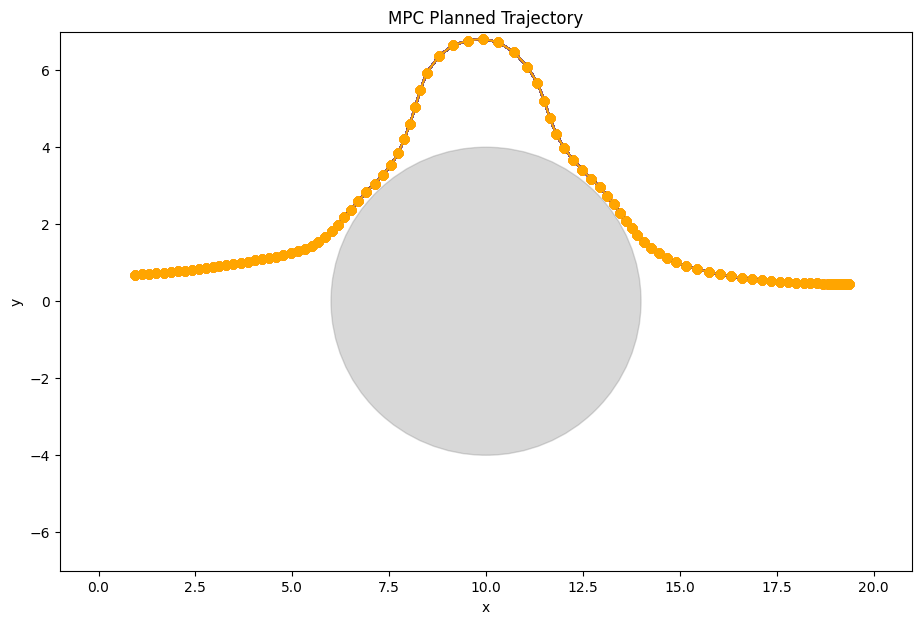

In [58]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

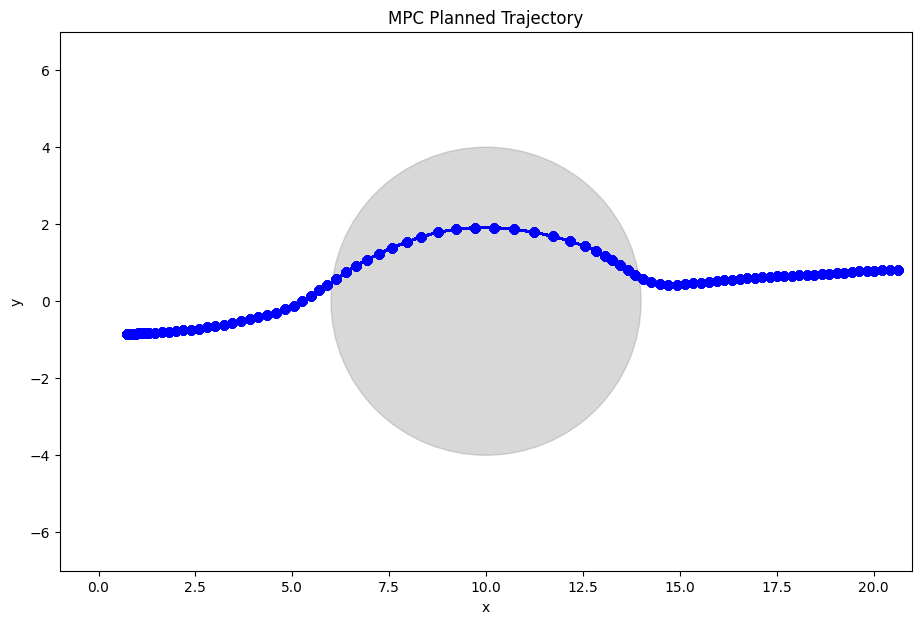

In [59]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_restore_big/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

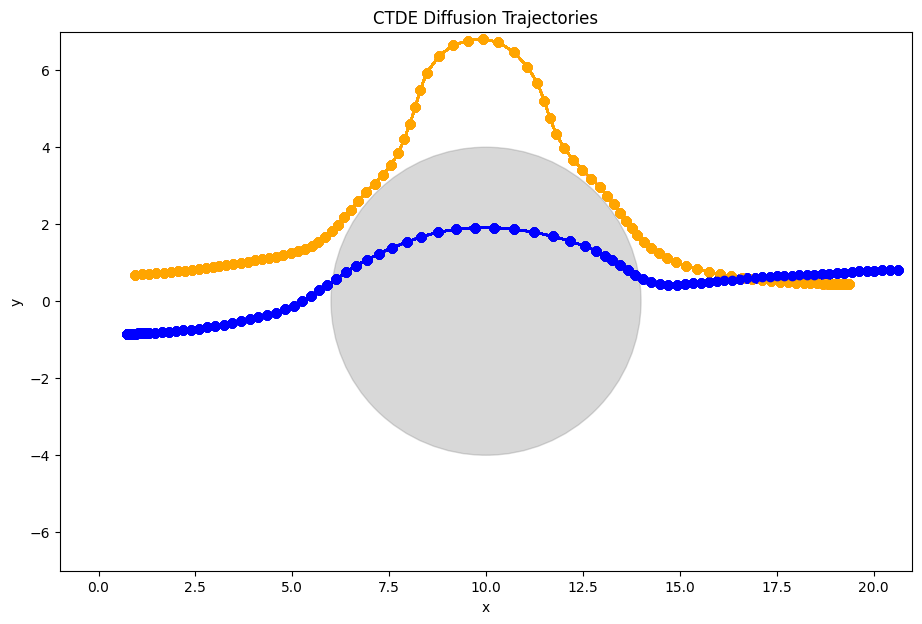

In [60]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [61]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(0)

In [62]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

100

In [63]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

100

In [ ]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Vary Initial Position

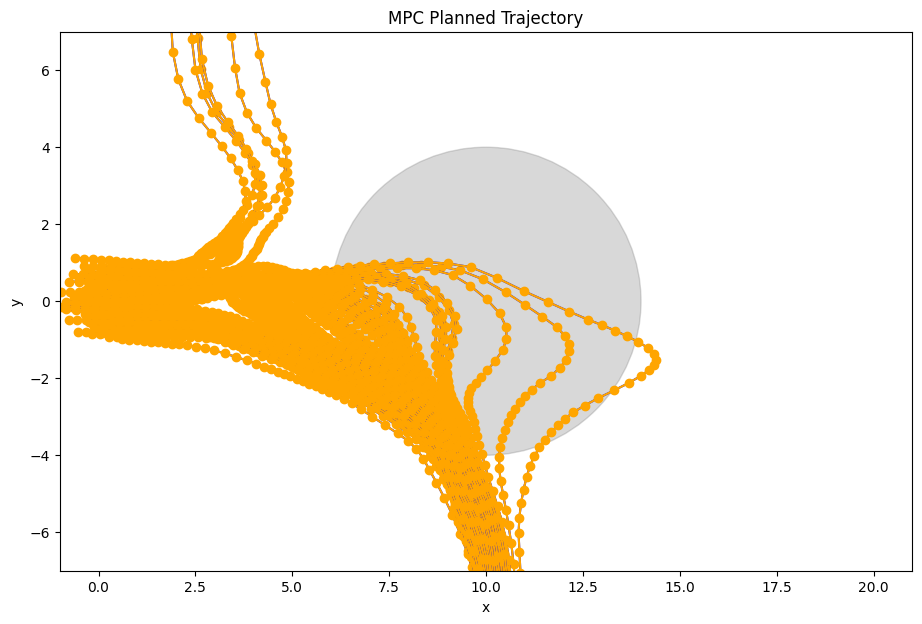

In [64]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos/vary_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

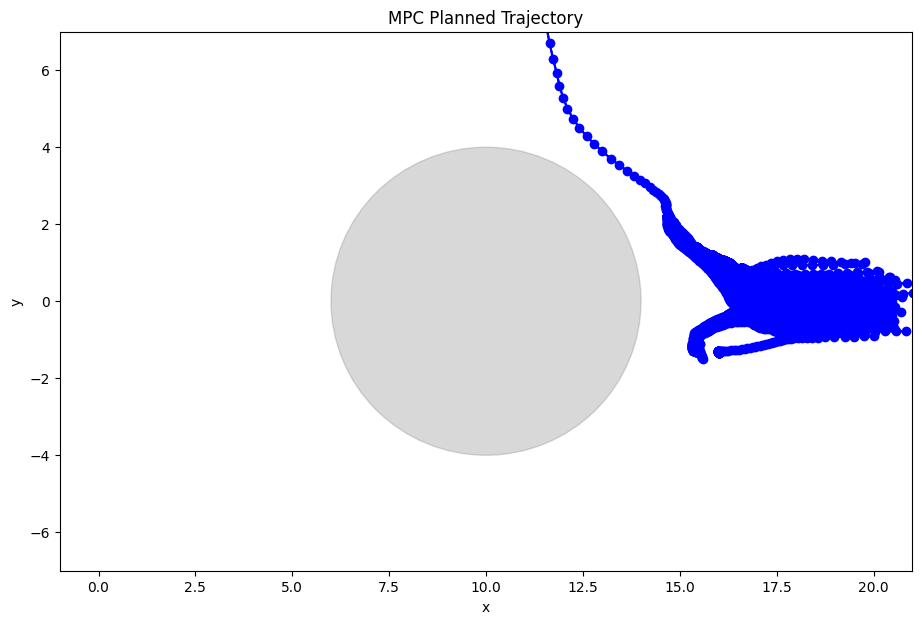

In [65]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos/vary_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

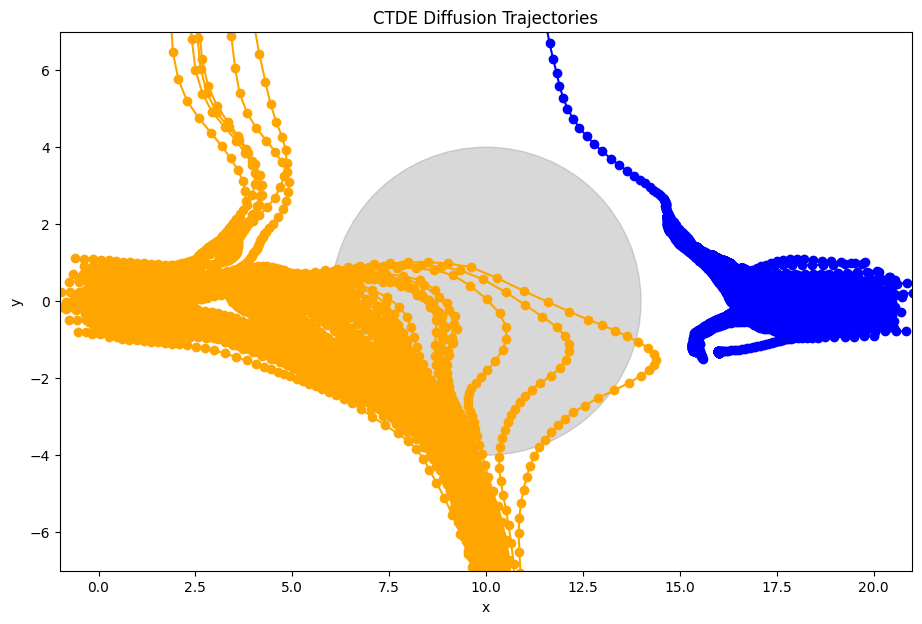

In [66]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [68]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(0)

In [69]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

72

In [70]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

72

In [71]:
# MAGAIL Conditioned on Own Current Position and Other's Current Position Static Initial Position

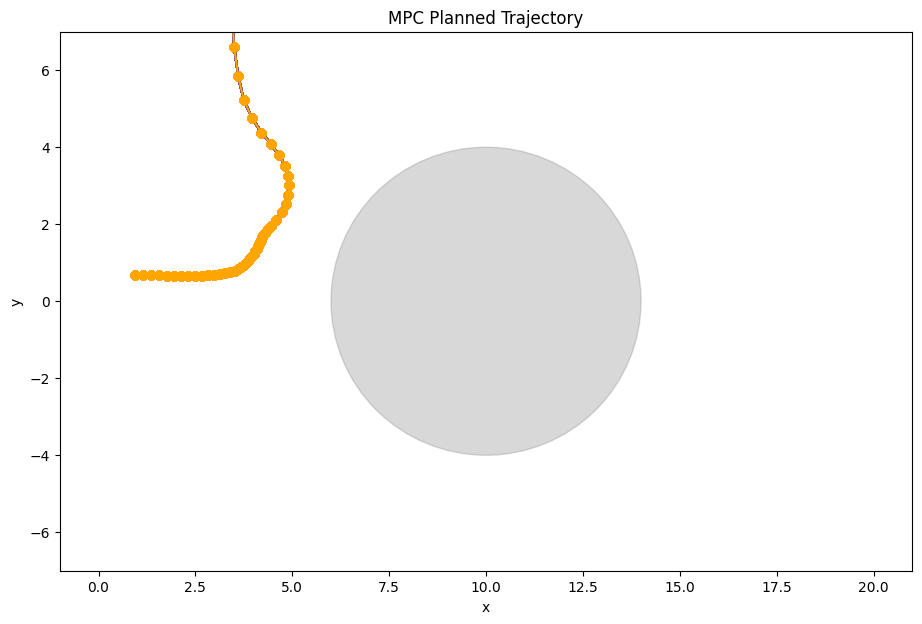

In [72]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data1 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos/static_init/mpc_traj1_%s.npy" % i)
    expert_data1.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='orange')

plt.show()

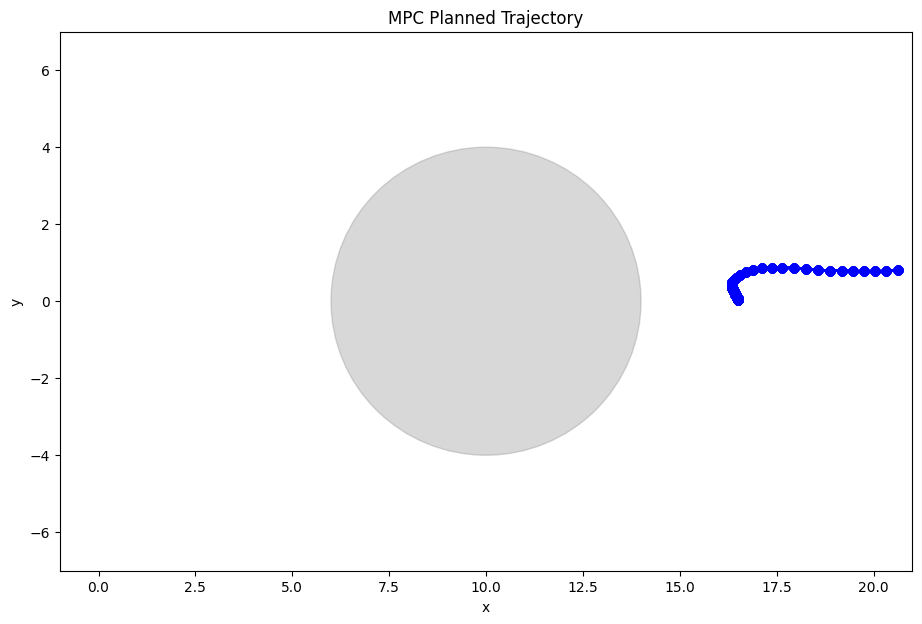

In [73]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("MPC Planned Trajectory")

expert_data2 = []

for i in range(100):
    data = np.load("sampled_trajs/magail_nofinalpos/static_init/mpc_traj2_%s.npy" % i)
    expert_data2.append(data)
    plt.plot(data[:, 0], data[:, 1], 'b.-')
    plt.plot(data[:, 0], data[:, 1], 'o-', color='blue')

plt.show()

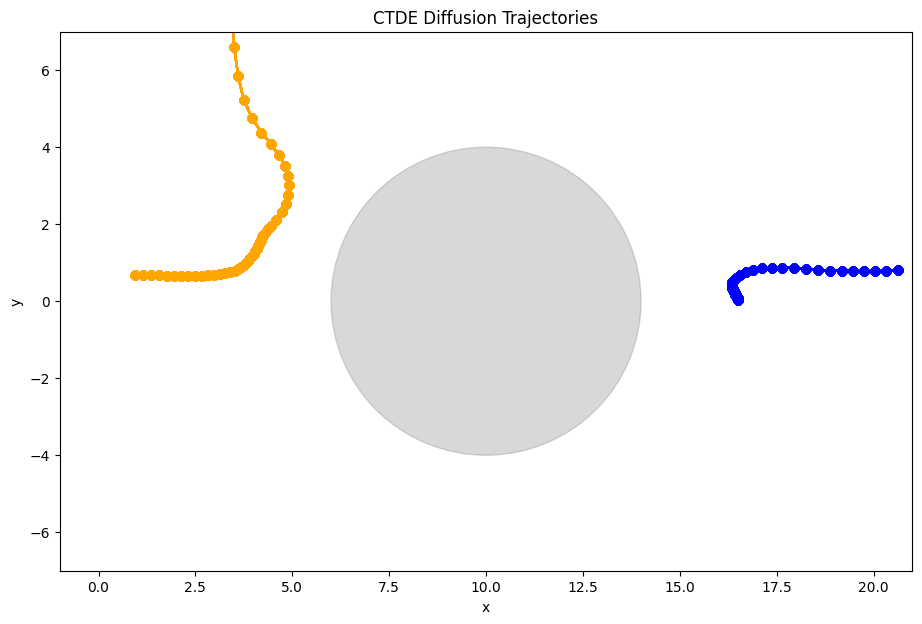

In [74]:
plt.figure(figsize=(11, 7))
plt.ylim(-7, 7)
plt.xlim(-1,21)
obstacle = (10, 0, 4.0) 
ox, oy, r = obstacle
circle1 = plt.Circle((ox, oy), r, color='gray', alpha=0.3)
plt.gca().add_patch(circle1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("CTDE Diffusion Trajectories")

for i in range(100):
    plt.plot(expert_data1[i][:, 0], expert_data1[i][:, 1], 'o-', color='orange')
    plt.plot(expert_data2[i][:, 0], expert_data2[i][:, 1], 'o-', color='blue')

In [75]:
count_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7)

np.int64(0)

In [76]:
count_collisions_obstacle(np.array(expert_data1), np.array(expert_data2), radius=3.6)

0

In [77]:
count_total_collisions(np.array(expert_data1), np.array(expert_data2), threshold=2.7, radius=3.6)

0